In [ ]:
#Importing the necessary libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pylab

import time
from scipy.stats import pearsonr

In [ ]:
#Importing our dataset from the file 

In [12]:
df = pd.read_excel(r"C:/Users/Vidhya/Downloads/Customer_retention_dataset_1/Customer_retention_dataset/customer_retention_dataset.xlsx")

In [ ]:
#Checking the information of the data

In [14]:
df.info

<bound method DataFrame.info of     1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                

In [15]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [ ]:
#Our data has 5 rows and 71 columns

In [19]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [ ]:
#Pre-processing the columns names

In [20]:
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [21]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,What browser do you run on your device to access the website?,Which channel did you follow to arrive at your favorite online store for the first time?,"After first visit, how do you reach the online retail store?",How much time do you explore the e- retail store before making a purchase decision?,What is your preferred payment Option?,How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"Why did you abandon the “Bag”, “Shopping Cart”?",The content on the website must be easy to read and understand,Information on similar product to the one highlighted is important for product comparison,Complete information on listed seller and product being offered is important for purchase decision.,All relevant information on listed products must be stated clearly,Ease of navigation in website,Loading and processing speed,User friendly Interface of the website,Convenient Payment methods,Trust that the online retail store will fulfill its part of the transaction at the stipulated time,Empathy (readiness to assist with queries) towards the customers,Being able to guarantee the privacy of the customer,"Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",Online shopping gives monetary benefit and discounts,Enjoyment is derived from shopping online,Shopping online is convenient and flexible,Return and replacement policy of the e-tailer is important for purchase decision,Gaining access to loyalty programs is a benefit of shopping online,Displaying quality Information on the website improves satisfaction of customers,User derive satisfaction while shopping on a good quality website or application,Net Benefit derived from shopping online can lead to users satisfaction,User satisfaction cannot exist without trust,Offering a wide variety of listed product in several category,Provision of complete and relevant product information,Monetary savings,The Convenience of patronizing the online retailer,Shopping on the website gives you the sense of adventure,Shopping on your preferred e-tailer enhances your social status,You feel gratification shopping on your favorite e-tailer,Shopping on the website helps you fulfill certain roles,Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (P

In [ ]:
#Checking the shape of our dataset

In [22]:
df.shape

(269, 71)

In [ ]:
#Dataset has 269 rows and 71 columns

In [ ]:
#Checking the datatypes of our data

In [23]:
df.dtypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

In [ ]:
#All the columns are of object datatype except for pincode column which is of int type

In [ ]:
#Checking if there are any null values

In [24]:
df.isnull().sum().any()

False

In [ ]:
#There are no null values is the dataset

In [25]:
df.nunique()

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

In [ ]:
#All the columns are of categorical types. There are no identifier or constant columns

In [26]:
personal_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']

In [ ]:
#Personal Info

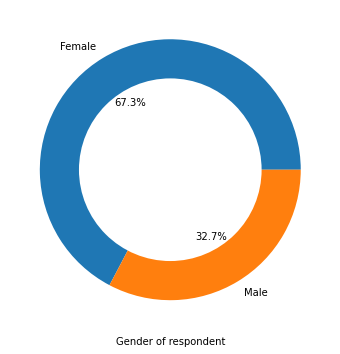

<Figure size 432x288 with 0 Axes>

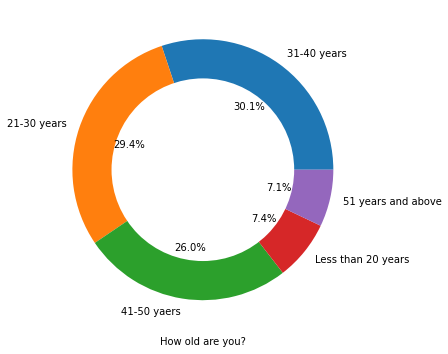

<Figure size 432x288 with 0 Axes>

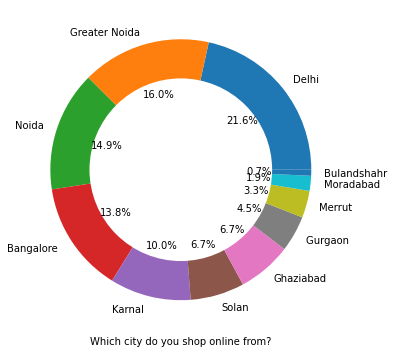

<Figure size 432x288 with 0 Axes>

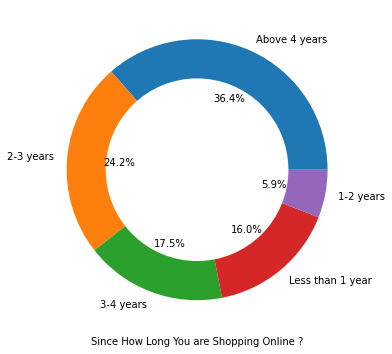

<Figure size 432x288 with 0 Axes>

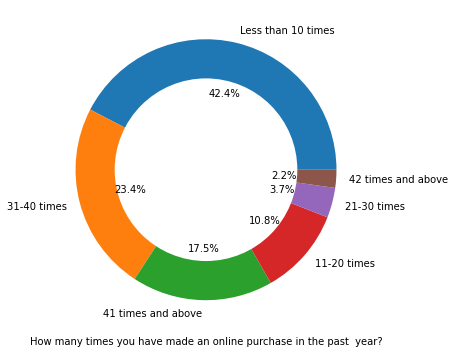

<Figure size 432x288 with 0 Axes>

In [27]:
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

In [ ]:
#There is double the number of women than men who have taken this survey. -Most of the people are in their 30's followed by 20's, teenagers and senior citizen are the least in number. -Most of the people belong from delhi, noida and banglore, ambiguity can also be seen as noida has two categories (noida and grater noida) which need to be handled -Most of the people shopping online have been shopping from a long time. -Majority of people shop online 10 times a year, amiguity can also be seen for range 42 times and above which needs to be handled

In [ ]:
#Intention of Repeat purchase

In [28]:
#Resolving ambiguity of column 
#Changing 42 times and above to 41 times and above
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',
                                                                                inplace=True)

In [30]:
import warnings
warnings.simplefilter("ignore")

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

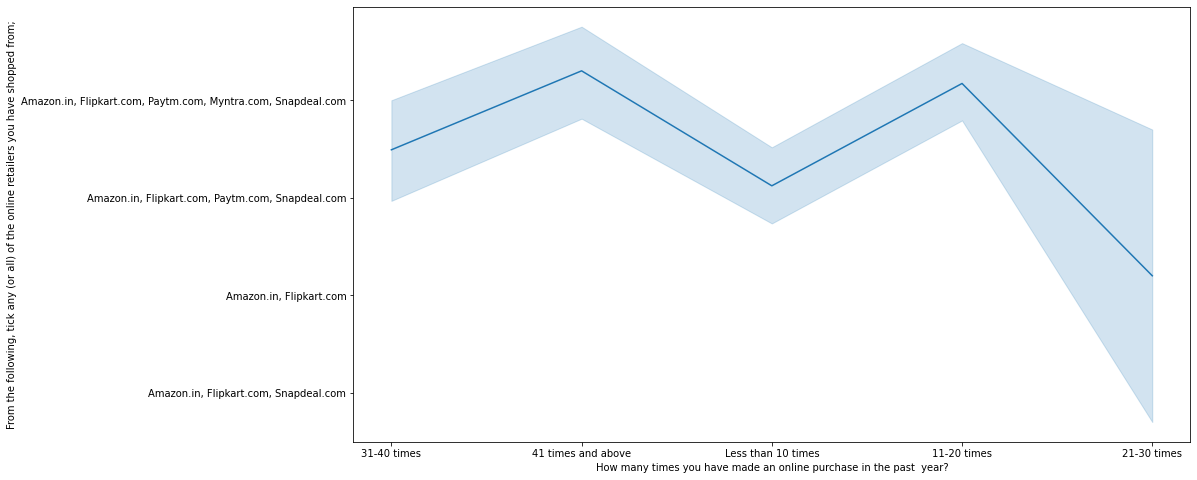

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

In [ ]:
#Heavy shoppers who shop more than 41 times a year shop from all the online brands, some of the people who shop for 32-40 and less than 10 times a year seem to exclude myntra. People shop from Amazon and flipkart whatever be the case.

In [ ]:
#Converting years to numbers for better analysis

In [32]:
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['How many times you have made an online purchase in the past  year?'].replace(dict)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

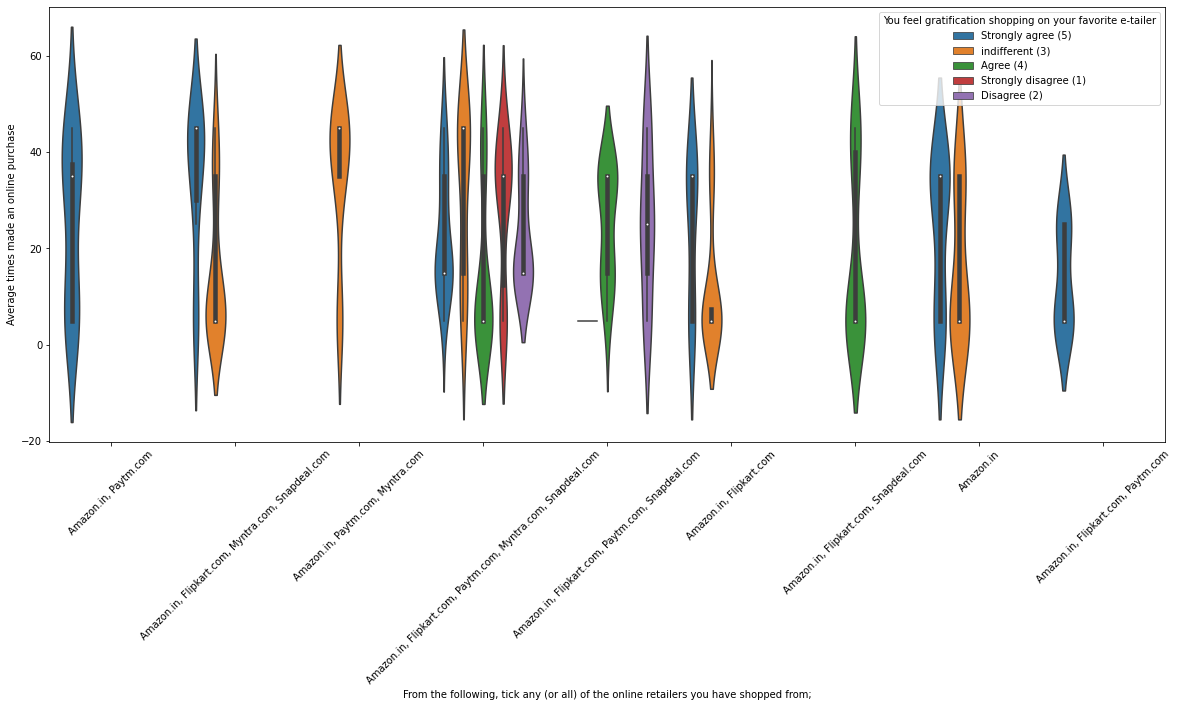

In [33]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)

In [ ]:
#Almost all the people who have shopped from amazon, flipkart and paytm are satisfied. People who shop from a more number of online brands dosent seem to be satisfied.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

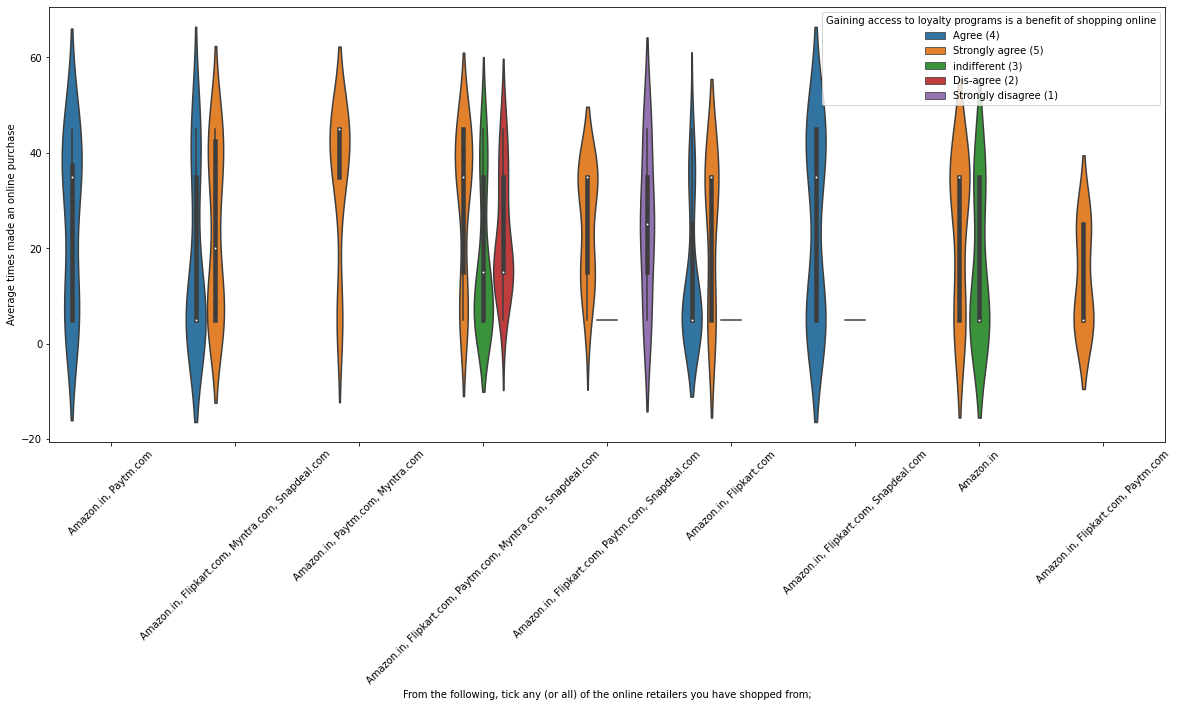

In [34]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=45)

In [ ]:
#People shopping from amazon and paytm are getting benefits from the loyalty points, flipkart and sanpdeal also seem to give such benefits but people who shop from almost everywhere disagree with this statement too

In [ ]:
#Online Retailing:

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

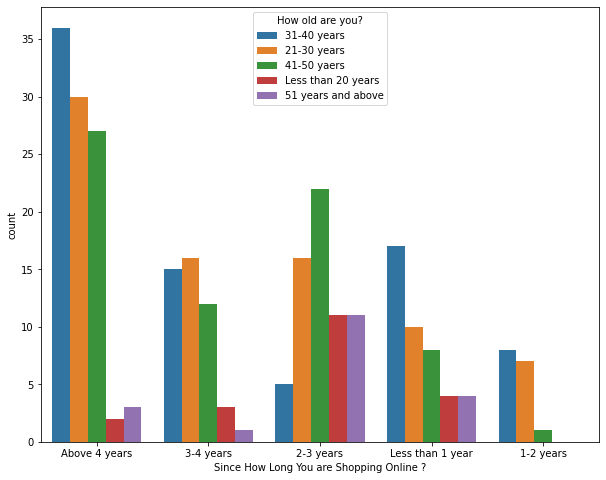

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

In [ ]:
#Highest number of people have been shopping online for above 4 years except for the age group below 20 years and above 50 years. People who are shopping online for 1-2 years does not include teenagers and elder people.

In [36]:
df['Since How Long You are Shopping Online ?'].unique()

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

In [37]:
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['Since How Long You are Shopping Online ?'].replace(dict)

In [38]:
df['Which city do you shop online from?'].unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

In [39]:
#Changing Greater noida to noida
df['Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Average years of shopping online'>

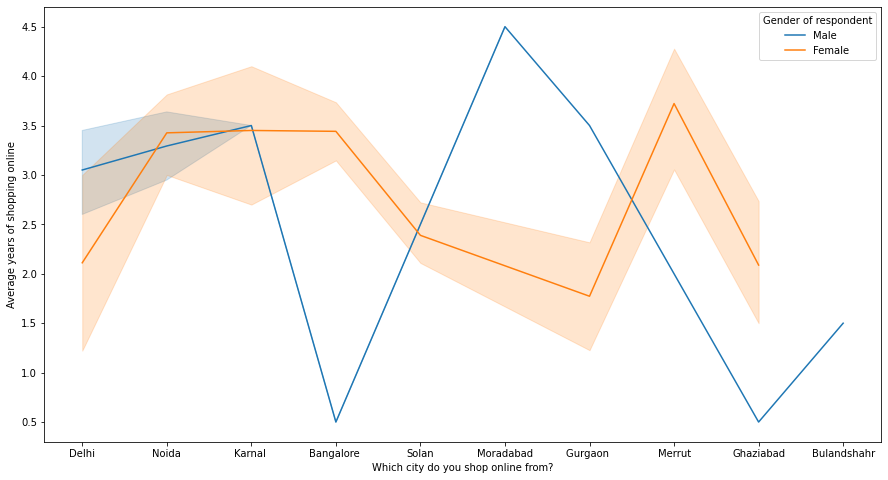

In [40]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Which city do you shop online from?'],df['Average years of shopping online'],hue=df['Gender of respondent'])

In [ ]:
#In lines, we can see that density of female customers is more than male. Men living in banglore and ghaziabad shop have shopped online for less than 1 year. Highest number of men shopping online belong from delhi and noida, while men from moradabad have been shopping online for the longest. Women from meerut and noida have shopped the longest.

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

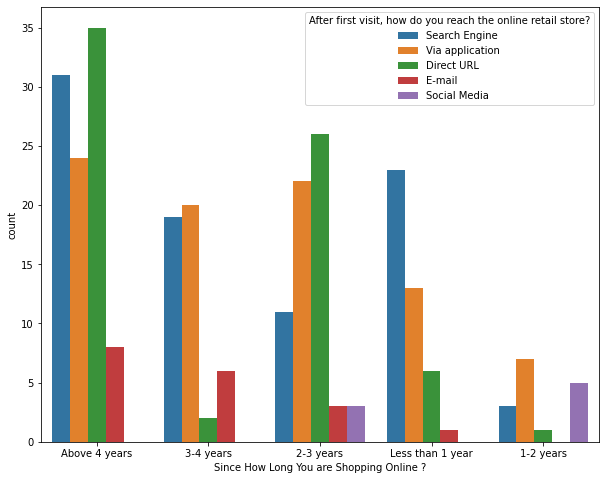

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])

In [ ]:
#Even though people who are shopping online for more than 3 years donot use the application rather use search engine and direct url's in large number which indicates that online brands should update all their platforms rather than just application.

In [ ]:
#Brand image

In [42]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

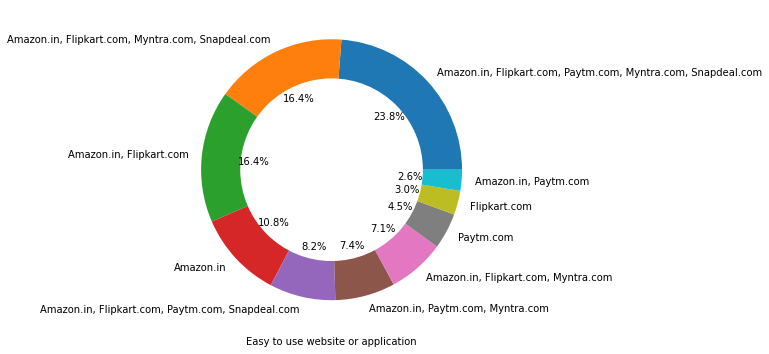

<Figure size 432x288 with 0 Axes>

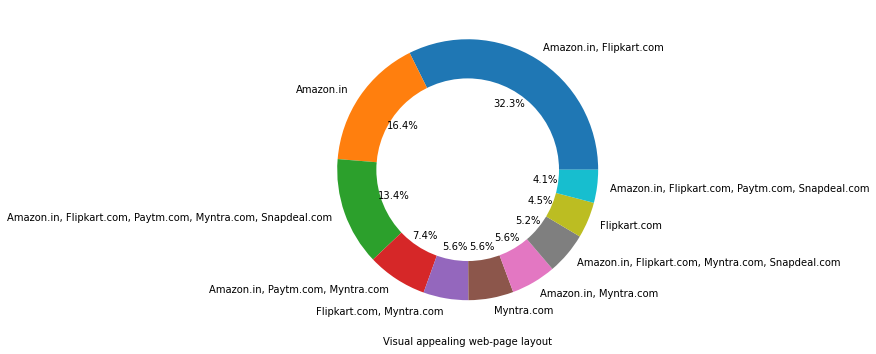

<Figure size 432x288 with 0 Axes>

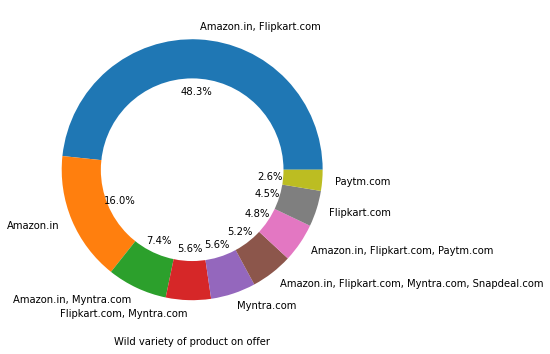

<Figure size 432x288 with 0 Axes>

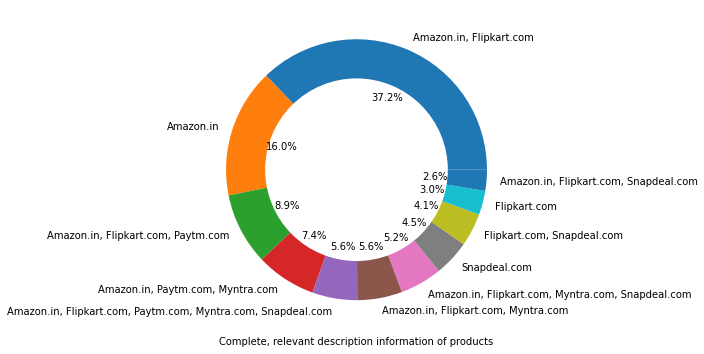

<Figure size 432x288 with 0 Axes>

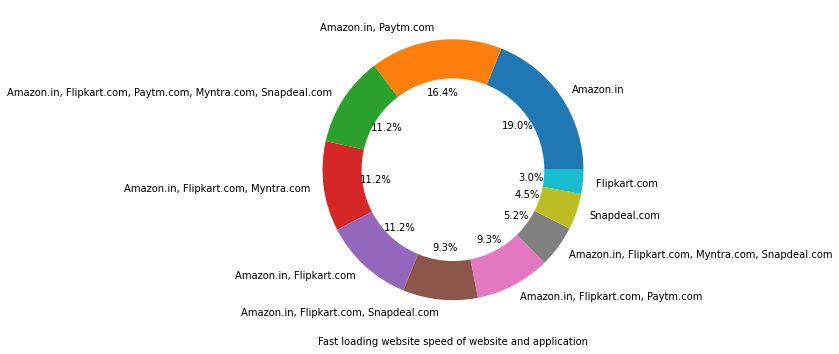

<Figure size 432x288 with 0 Axes>

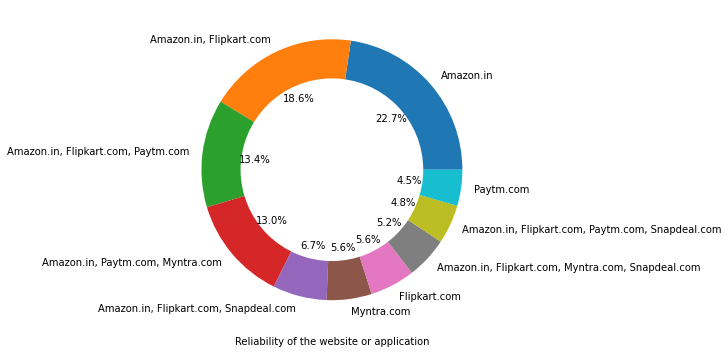

<Figure size 432x288 with 0 Axes>

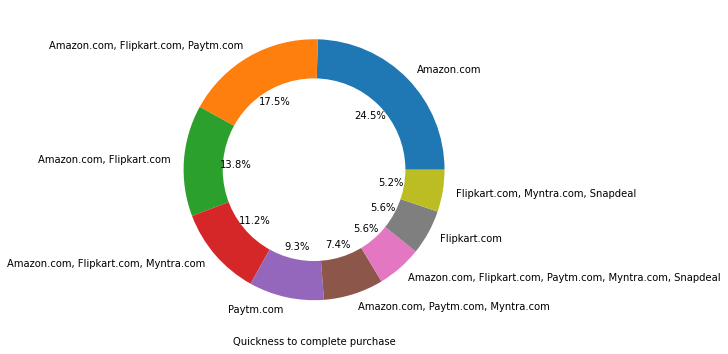

<Figure size 432x288 with 0 Axes>

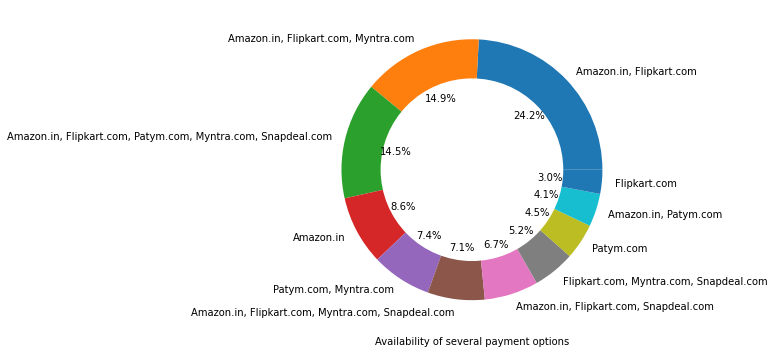

<Figure size 432x288 with 0 Axes>

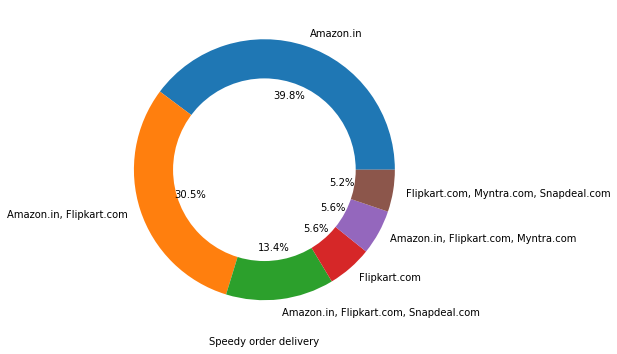

<Figure size 432x288 with 0 Axes>

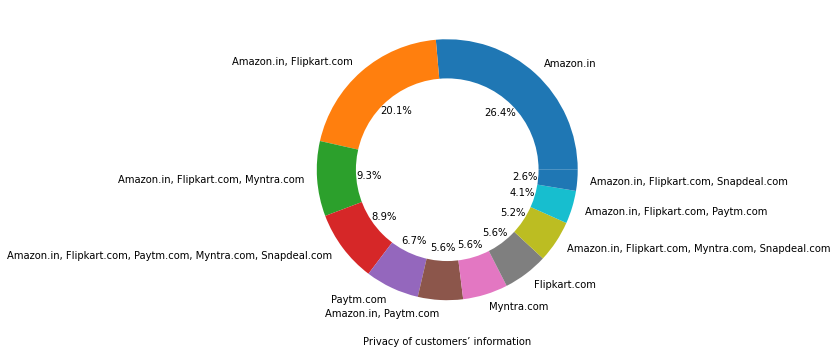

<Figure size 432x288 with 0 Axes>

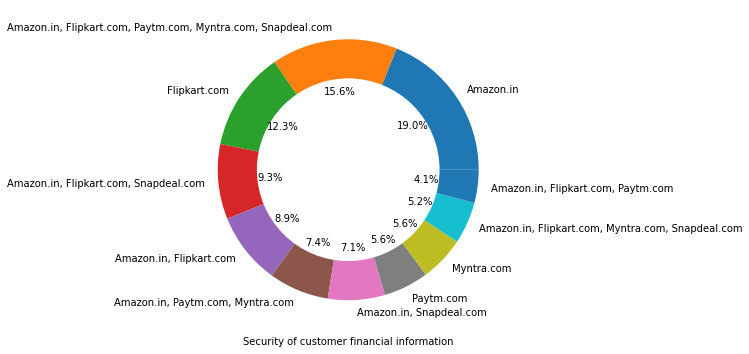

<Figure size 432x288 with 0 Axes>

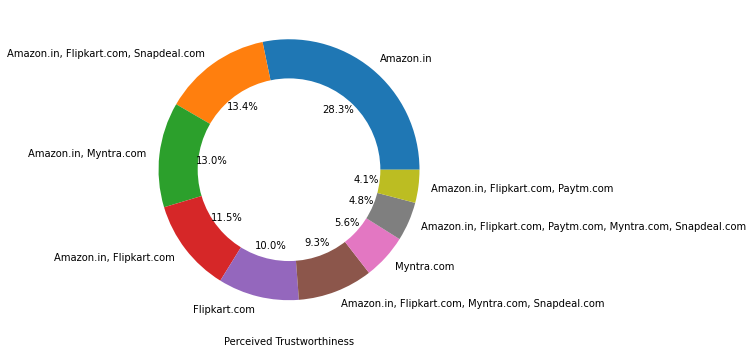

<Figure size 432x288 with 0 Axes>

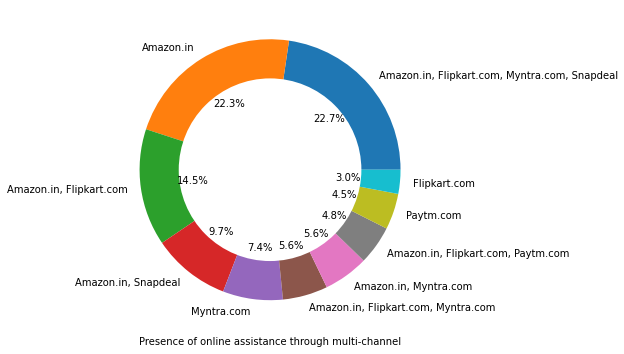

<Figure size 432x288 with 0 Axes>

In [43]:
for i in performance:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

In [ ]:
#Amazon, Flipkart have been had the highest votes for having all the positive points and have maintained a very good brand image followed by paytm and the myntra.

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

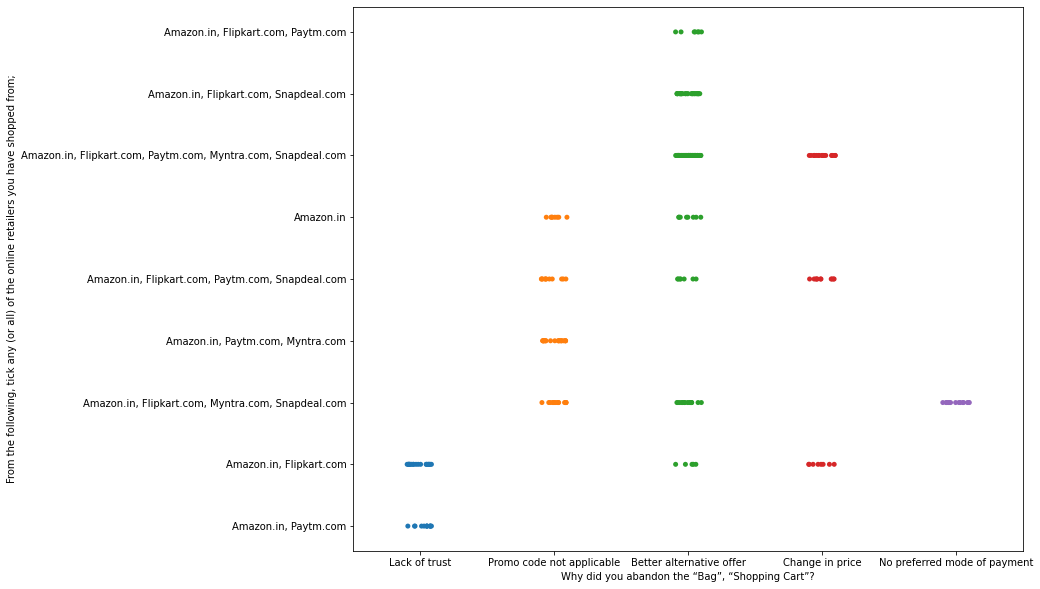

In [44]:
plt.figure(figsize=(12,10))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

In [ ]:
#We can clearly see that most of the time people abandon the bag is beacuse they get a better alternative offer or promo code not applicable. There is also lack of trust seen in amazon, flipkart and paytm by some people.

In [ ]:
#LOyalty
#Loyal customers are those who keep using the same brand even if it is not good as other brands

In [45]:
#Collecting all the negative remarks about a brand
bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

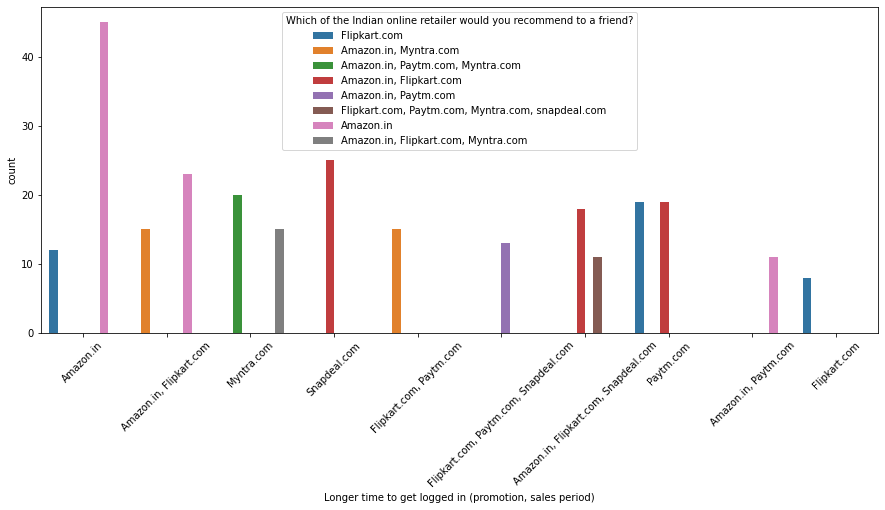

<Figure size 432x288 with 0 Axes>

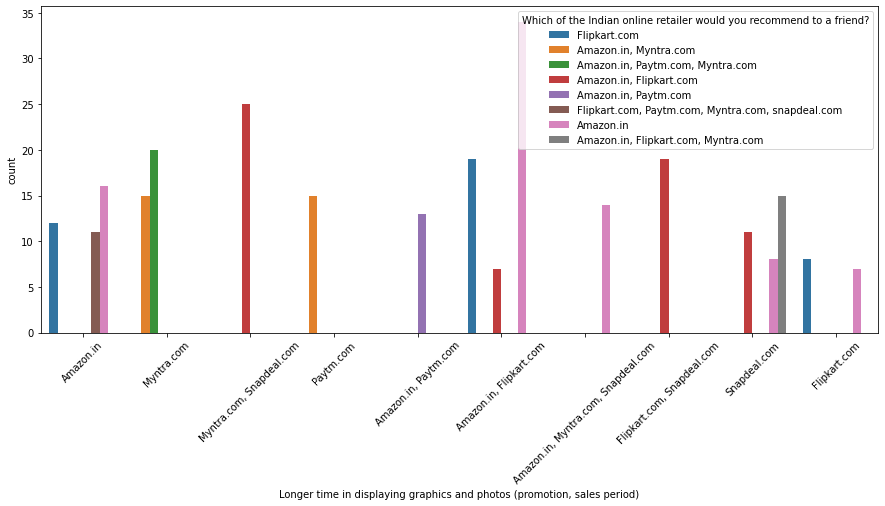

<Figure size 432x288 with 0 Axes>

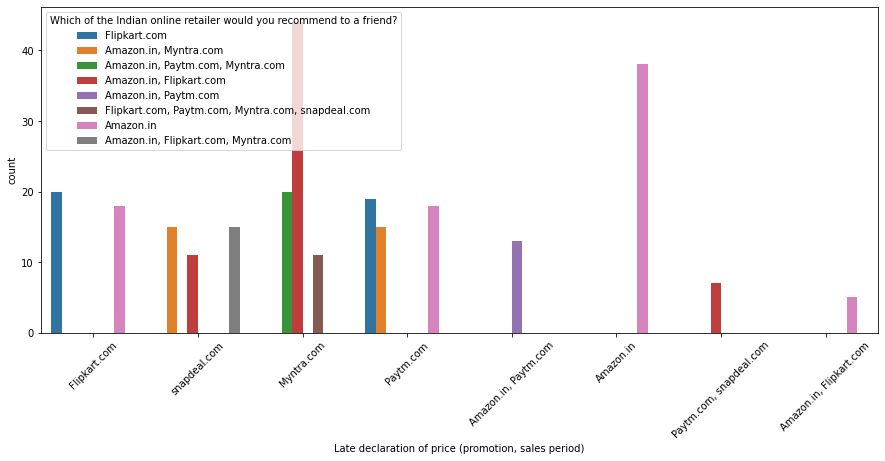

<Figure size 432x288 with 0 Axes>

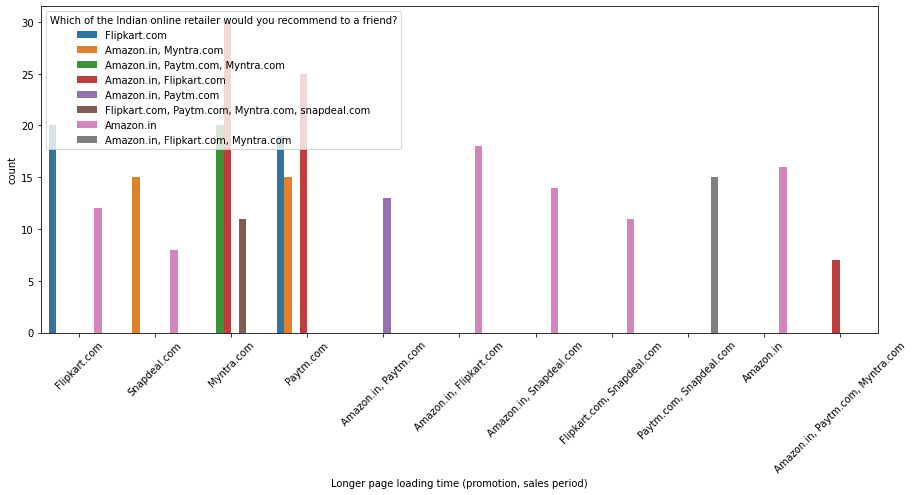

<Figure size 432x288 with 0 Axes>

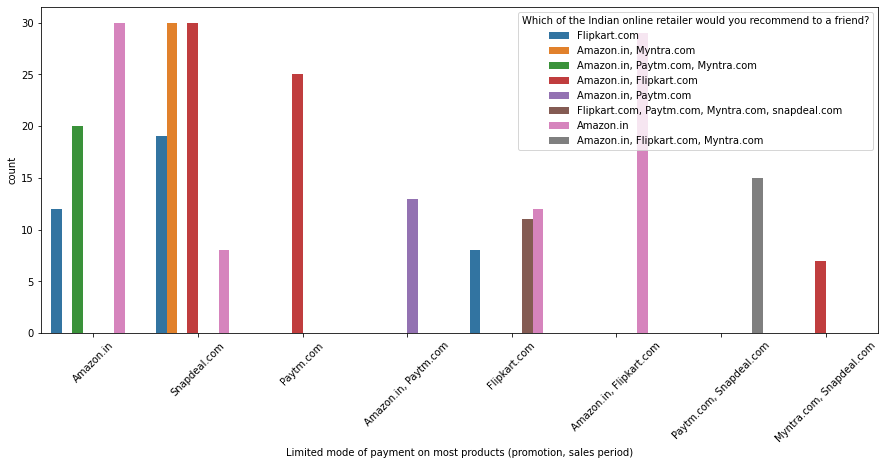

<Figure size 432x288 with 0 Axes>

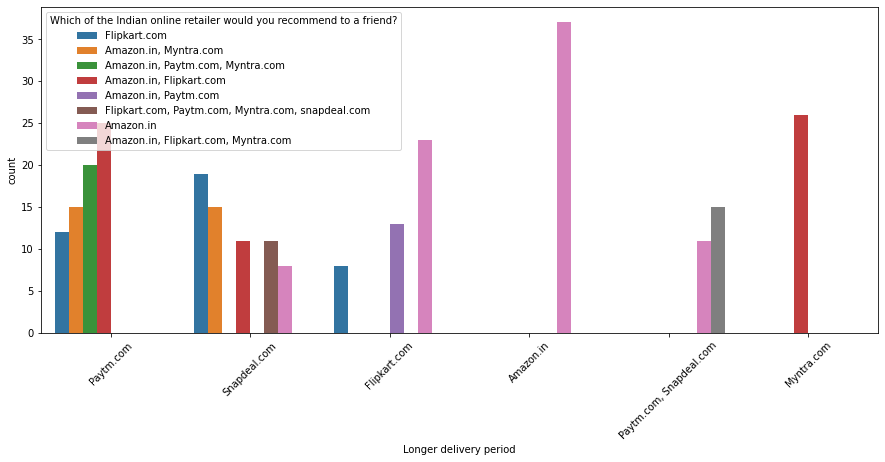

<Figure size 432x288 with 0 Axes>

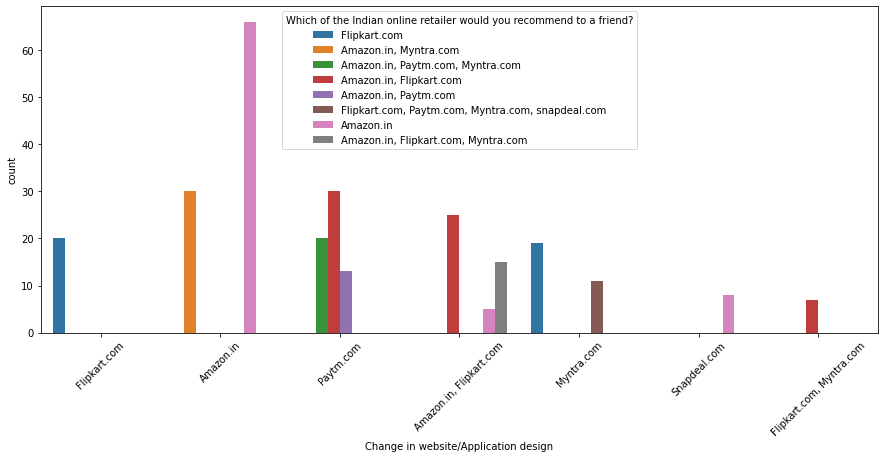

<Figure size 432x288 with 0 Axes>

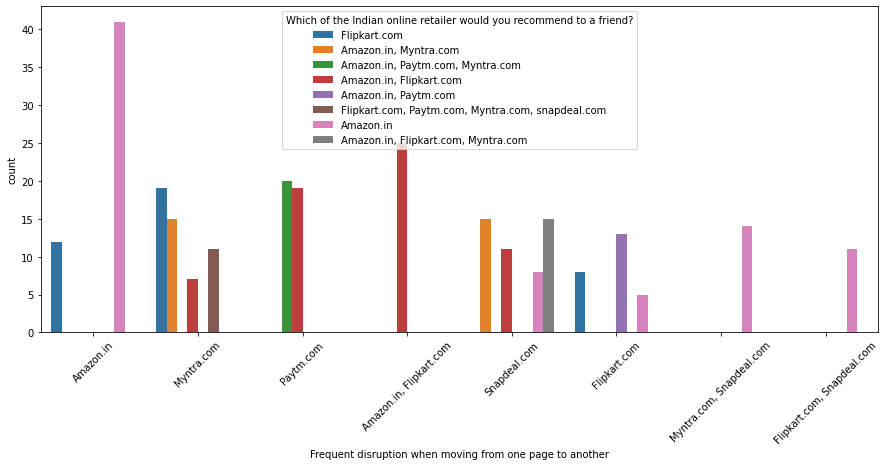

<Figure size 432x288 with 0 Axes>

In [46]:
for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

In [ ]:
#Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks about them still they would recommend these platforms to their friend

In [ ]:
#Processing the dataframe
#Separating the label from rest of the features

In [47]:
x=df.copy()
x.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1,inplace=True)
y=df['Which of the Indian online retailer would you recommend to a friend?']

In [ ]:
#Encoding Categorical Features

In [48]:
cat=[i for i in x.columns if x[i].dtypes=='O']

In [49]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encode=OrdinalEncoder()
labe=LabelEncoder()

In [50]:
#using ordinal encoder for independent features
for i in cat:
    x[i]=encode.fit_transform(x[i].values.reshape(-1,1))

#Using label encoder for Label Column
y=labe.fit_transform(y)

In [ ]:
#Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [52]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [ ]:
#Using various feature selection method to see which feature affects the most

In [ ]:
#Using Feature importance of random forrest

In [53]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(x,y)

RandomForestClassifier()

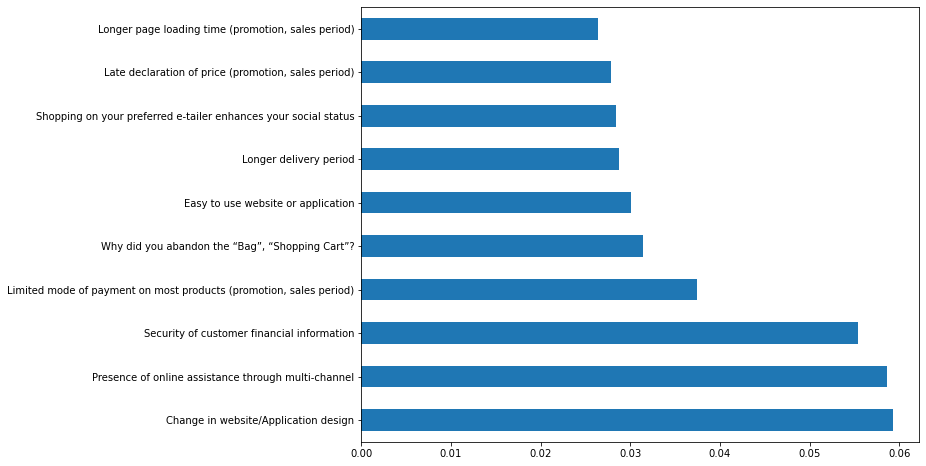

In [54]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(m.feature_importances_, index=x.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#In the above chart we can see that above features are of most importance in determining whhich platform will a ciustomer recommend to his friend.

In [ ]:
#Using chi2 test

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(x,y)

In [57]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [58]:
print(featureScores.nlargest(10,'Score'))  #print10 best features
feat=list(featureScores.nlargest(10,'Score')['Features'])

                                             Features      Score
16    Why did you abandon the “Bag”, “Shopping Cart”?  75.754028
22                       Loading and processing speed  59.810983
42  Shopping on the website gives you the sense of...  59.253569
10  What browser do you run on your device to acce...  57.171099
67               Change in website/Application design  55.301526
49                   Visual appealing web-page layout  54.245760
65  Limited mode of payment on most products (prom...  53.269266
61  Longer time to get logged in (promotion, sales...  48.222655
62  Longer time in displaying graphics and photos ...  48.130643
50                   Wild variety of product on offer  47.605973


In [ ]:
#PCA

In [59]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

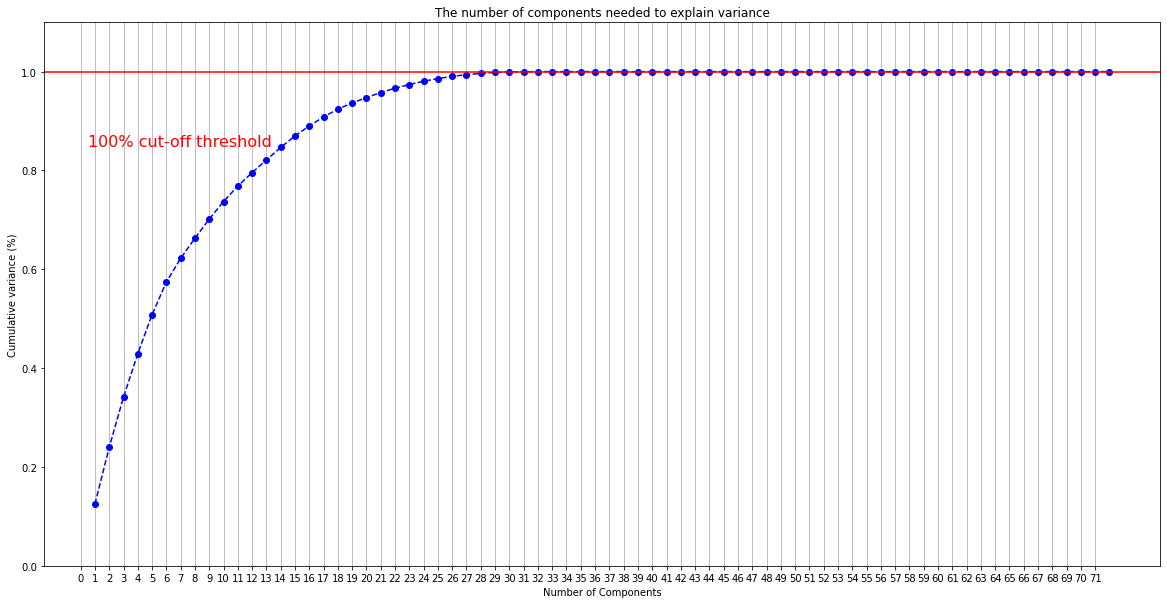

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 73, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 72, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#We can clearly see that with 29 features all the information can be retained

In [61]:
pca=PCA(n_components=29)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,2.065419,-0.577759,-1.030081,-1.109784,0.652387,-1.137025,0.699876,-0.023177,-0.960103,-0.238855,-0.436650,-0.539191,0.130180,0.178306,-0.104644,-0.339286,0.379243,-0.431515,-0.272189,0.598931,0.068875,-0.266070,-0.009322,-0.128444,-0.024680,-0.225888,-0.104111,-0.203283,-0.207393
1,0.048667,-1.490547,1.081348,0.641617,0.066388,-0.820495,0.072214,-0.644870,0.087754,-0.296247,-0.157354,0.881935,0.648067,0.345759,0.329984,0.372285,-0.486708,-0.456116,-0.403685,-0.176390,-0.008384,0.155024,0.313679,0.079454,-0.162517,-0.101240,0.295586,-0.135537,0.122856
2,1.671684,-0.120022,0.775570,-1.481374,0.128287,0.836151,-0.793600,0.102789,0.448813,-0.515949,-0.033307,-0.086125,0.368685,-0.447427,0.281074,0.230154,-0.136122,0.074572,0.140000,0.038239,-0.068419,0.008284,0.215976,-0.037138,0.094985,-0.174314,0.156931,-0.006150,-0.166877
3,-0.009522,2.146296,0.753236,-0.363176,-1.348954,-0.176575,0.567430,-0.548924,-0.142604,-0.084665,-0.341339,0.095133,0.089171,0.086230,-0.201624,-0.132961,0.167764,0.160252,0.075425,0.025910,0.229481,-0.091051,0.190278,-0.069483,-0.059019,-0.140161,0.103730,0.035920,-0.116666
4,0.051352,-0.187387,2.386865,0.914150,0.273219,-0.992250,-0.511792,0.701105,-0.225943,0.735107,0.138216,-0.814487,-0.204856,-0.294430,-0.127501,0.336204,0.214469,-0.030964,0.205835,-0.032298,0.130742,-0.195750,-0.163709,-0.071655,-0.186014,0.047217,0.185140,-0.035241,0.134780


In [ ]:
#Modelling Phase

In [65]:
!pip install xgboost

In [66]:
# Import XGBoost
import xgboost as xgb
# XGBoost Classifier
from xgboost import XGBClassifier

In [67]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
#Using train test split method

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
#Random Forest

In [69]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
p=model.predict(xtest)
s=cross_val_score(model,x,y,cv=10)

In [70]:
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 0.9889
----------------------------------------------------------
Confusion Matrix
[[26  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  2]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2

    accuracy                

In [ ]:
#Xgboost

In [71]:
model=XGBClassifier(verbosity=0)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
s=cross_val_score(model,x,y,cv=10)

In [72]:
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 0.9926
----------------------------------------------------------
Confusion Matrix
[[26  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  2]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2

    accuracy                

In [ ]:
#Hyperparameter Tuning

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Random Forest

In [74]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]}

In [75]:
g=RandomizedSearchCV(RandomForestClassifier(),params,cv=10)

In [76]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15, 20, 25, 30,
                                                      35, 40],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [77]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 30}
0.9947368421052631


In [78]:
m=RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=4,n_estimators=700)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [79]:
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 0.9926
----------------------------------------------------------
Confusion Matrix
[[26  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  2]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2

    accuracy                

In [ ]:
#Xgboost

In [80]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [81]:
g=RandomizedSearchCV(XGBClassifier(),params,cv=10)

In [82]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [83]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
{'subsample': 1, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1}
0.9894736842105264


In [84]:
m=XGBClassifier(max_depth=10,learning_rate=0.1,n_estimators=500,subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [85]:
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 0.9926
----------------------------------------------------------
Confusion Matrix
[[26  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  2]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2

    accuracy                

In [ ]:
#Both the models give accurate and equal results so we choose xgboost as or final model because of its quick speed.

In [ ]:
#Finalizing the best Model

In [86]:
model=XGBClassifier(max_depth=2,learning_rate=0.01,n_estimators=500,subsample=1)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

In [ ]:
#Evaluation Metrics

In [87]:
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 0.9926
----------------------------------------------------------
Confusion Matrix
[[26  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  2]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2

    accuracy                

In [ ]:
#Saving the Model

In [89]:
import pickle

In [90]:
with open('file.pkl', 'wb') as file:
    pickle.dump(df, file)

with open('file.pkl', 'rb') as file:
    df=pickle.load(file)

In [ ]:
#Conclusion
#The results of this study suggest following outputs which might be useful for E-commerce websites to extend their business

#The cost of the product, the reliability of the E-commerce company and the return policies all play an equally important role in deciding the buying behaviour of online customers. The cost is an important factor as it was the basic criteria used by online retailers to attract customers. The reliability of the E-commerce company is also important, as it is even required in offline retail. It is important because customers are paying online, so they need to be sure of security of the online transaction. The return policies are important because in online retail customer does not get to feel the product. Thus, he wants to be sure that it will be possible to return the product if he does not like it in real. Whereas, the logistics factor, which included Cash on delivery option, One day delivery and the quality of packaging plays a secondary role in this process though these are Must-be-quality. This is so because these all does not interfere with the real product and people believe that this is the basic value that E-commerce websites provide.
#All the websites were not equally preferred by online customers. Amazon was the most preferred followed by Flipkart. This can be explained easily by previous result that we got. These two companies are most trusted in the industry and hence, have a huge reliability. Also, the sellers listed on these websites are generally from Tier 1 cities as compared to Snapdeal and PayTM which have more sellers from tier 2 and 3 cities. Also, these websites have the most lenient return policies as compared to others and also the time required to process a return is low for these.